# Face Generative Adversial Network 

Challenge_1: Use the CelebA dataset to generate realistic faces using a DCGAN <br>
Challenge_2: Understand and extract the internal structure of the faces to create customizable and unique faces<br>
Challenge_3: Face interpolation
Challenge_4: ProGAN 

In [1]:
# load libraries 
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.utils as vutils
import numpy as np 
import matplotlib.pyplot as plt
import cv2
import os 

# device gpu device
device = torch.device("cuda") 

data_dir = "data/img_align_celeba/"

image_list = [os.path.join(data_dir, i)
              for i in os.listdir(data_dir)]

First let's explore the image dataset

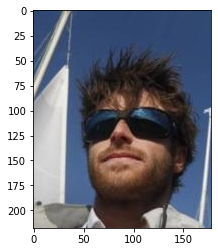

In [2]:
image = cv2.imread(image_list[3])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [3]:
image.shape

(218, 178, 3)

### Create Dataset

The data transformation pipeline resizes and crops the image to a square 64x64 pixels, finally it normalizes the values between -1 and 1 

In [4]:
imsize = 64
n_channels = 3
latent_size = 100

transform = transforms.Compose(
    [transforms.Resize(imsize),
     transforms.CenterCrop(imsize),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # normalize between [-1 1]


dataset = torchvision.datasets.ImageFolder(root="data/",
                           transform=transform)

batch_size = 32

dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=2,
                                         pin_memory=True)


## GAN MODEL

### Train Model

In [5]:
from models.GAN.GAN import GAN 

save_dir = "models/GAN/model_states/"


model = GAN(device=device, save_dir=save_dir)
model.compile()



In [6]:
n_epochs = 1
model.train(dataloader, n_epochs)

[0/1][0/6332]	Loss_D: 1.3876	Loss_G: 2.2156	Acc_dis: 0.4486	Acc_gen: 0.4402 / 0.1106
[0/1][100/6332]	Loss_D: 0.1625	Loss_G: 3.7794	Acc_dis: 0.8982	Acc_gen: 0.0432 / 0.0229
[0/1][200/6332]	Loss_D: 0.0750	Loss_G: 4.2676	Acc_dis: 0.9445	Acc_gen: 0.0159 / 0.0140
[0/1][300/6332]	Loss_D: 0.4204	Loss_G: 2.0564	Acc_dis: 0.7978	Acc_gen: 0.1556 / 0.1285
[0/1][400/6332]	Loss_D: 0.0625	Loss_G: 4.6629	Acc_dis: 0.9868	Acc_gen: 0.0478 / 0.0097
[0/1][500/6332]	Loss_D: 0.0223	Loss_G: 5.7772	Acc_dis: 0.9908	Acc_gen: 0.0130 / 0.0038
[0/1][600/6332]	Loss_D: 0.0226	Loss_G: 5.8681	Acc_dis: 0.9820	Acc_gen: 0.0043 / 0.0040
[0/1][700/6332]	Loss_D: 0.2505	Loss_G: 3.7273	Acc_dis: 0.8608	Acc_gen: 0.0714 / 0.0247
[0/1][800/6332]	Loss_D: 0.9279	Loss_G: 2.1669	Acc_dis: 0.6793	Acc_gen: 0.3613 / 0.1240
[0/1][900/6332]	Loss_D: 1.0124	Loss_G: 2.5539	Acc_dis: 0.4621	Acc_gen: 0.0556 / 0.0916
[0/1][1000/6332]	Loss_D: 0.2388	Loss_G: 3.4515	Acc_dis: 0.9315	Acc_gen: 0.1427 / 0.0406
[0/1][1100/6332]	Loss_D: 0.9824	Loss_G: 5.13

### Analysis

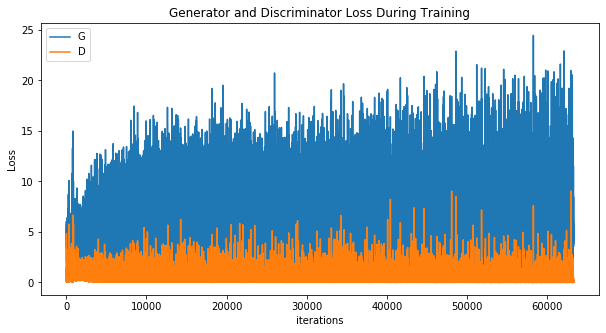

In [10]:
model.plot()

In [6]:
# load model from file 
load_dir = "models/GAN/model_states/version_0_10e/"
model.load(load_dir)

In [7]:
noise = torch.randn(32, 100,1, 1, device=device)
img = model(noise)

In [10]:
def display_images(img):
    fig = plt.figure(figsize=(16,16))
    plt.axis("off")
    img_list = [vutils.make_grid(img, padding=2, normalize=True).cpu().detach()]

    ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]
    plt.show()

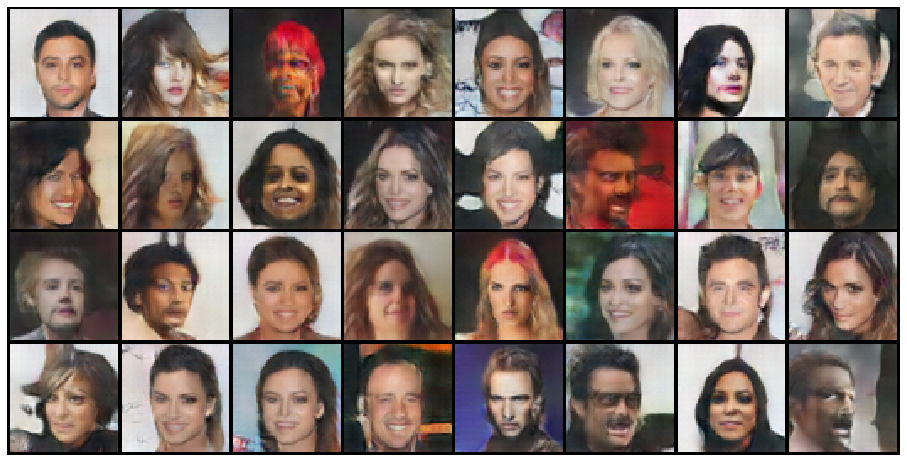

In [11]:
display_images(img)

## WGAN MODEL
### Train Model

### Model analysis